# Linear Regression from Scratch

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [135]:
def load_data(file_path):
    if os.path.exists(file_path) != True:
        raise FileNotFoundError("Given path does not exist! = {}", format(file_path))
    else:
        df = pd.read_csv(file_path)
    return df

def gradient(func, x):
    h = 0.0001
    return (func(x+h)-func(x))/h


In [136]:
file_name = 'real-estate-data.csv'
file_path = os.path.join('..', 'data', file_name)
df = load_data(file_path)


In [137]:
# EDA
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [138]:
np.array(df.drop(['id', 'date', 'price'], axis=1))


array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [169]:
# # defining the input and output variables
# target = np.array(df['price'])
# input = np.array(df.drop(['id', 'date', 'price'], axis=1))

class my_LinearRegression():
    # initialising with random values
    def __init__(self):
        self.m, self.b = None, None
        

    def fit(self, x_train, y_train, epochs = 1200, lr = 0.01):
        # reshaping y_train to make it a column vector
        x_train = x_train.copy()
        y_train = y_train.reshape(-1,1).copy()

        
        # required constants
        n, l = x_train.shape
        mu_x, sigma_x = np.mean(x_train, axis=0), np.std(x_train, axis=0)
        mu_y, sigma_y = np.mean(y_train), np.std(y_train)

        # normalising data
        # iterating through all columns, and the corresponding mean and variance
        for k in range(l):
            x_train[:,k] = (x_train[:,k]-mu_x[k])/sigma_x[k]
        y_train = (y_train-mu_y)/sigma_y

        # initialising with 0
        self.m = np.zeros((l,1))
        self.b = 0
        # dMSE_dm = np.zeros(l)
        m, b = self.m, self.b

        # initialising gradient descent
        for i in range(epochs):
            error = (np.matmul(x_train, m) + b - y_train)
            # * is element wise multiplication, followed by column wise sum
            dMSE_dm = (2/n)*np.sum(error*x_train, axis=0).reshape(-1,1)
            dMSE_db = (2/n)*np.sum(error)
            # need to update m and b values
            m -= lr*dMSE_dm
            b -= lr*dMSE_db
        ###### eND OF GRADIENT dESCENT ######

        # obtaining parameters for the unnormalized data
        m_unnorm = m.copy()
        b_unnorm = b*sigma_y + mu_y
        for k in range(l):
            m_unnorm[k,0] = (sigma_y/sigma_x[k])*m[k,0]
            b_unnorm += -(sigma_y/sigma_x[k])*m[k,0]*mu_x[k]
        self.m = m_unnorm
        self.b = b_unnorm

    def score(self, x_test, y_test):
        m, b = self.m, self.b
        error = np.matmul(x_test, m) + b - y_test
        MSE = np.mean(error*error)
        RMSE = np.sqrt(MSE)
        print("RMSE = {:.3f}".format(RMSE), " and MSE = {:.3f}".format(MSE))
    
    def predict(self, x):
        return np.matmul(x, (self.m)) + self.b



In [170]:
# test-train split
def test_train_split(X, Y, test_size=0.3):
    n = len(X)
    index = int(n*test_size)
    # print(index)
    x_test, x_train = X[:index], X[index:]
    y_test, y_train = Y[:index], Y[index:]
    return x_train, y_train, x_test, y_test

# splitting data
target = np.array(df['price'])                     
input = np.array(df.drop(['id', 'date', 'price'], axis=1))
# reshpaing the output to get it in one column
X, Y = input, target
x_train, y_train, x_test, y_test = test_train_split(X, Y)


In [171]:
model = my_LinearRegression()

model.fit(x_train, y_train)
model.score(x_test, y_test)


RMSE = 485208.086  and MSE = 235426886473.494


In [172]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
# x_train_reshaped = x_train.reshape(-1,1)

sk_model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
print(sk_model.coef_,'\n', model.m)
print(sk_model.intercept_, model.b)


[-3.41775798e+04  4.44918779e+04  1.06657159e+02  1.10954833e-01
  7.03261038e+03  5.05445186e+05  5.46780617e+04  2.81279710e+04
  9.87075646e+04  6.72886879e+01  3.93684710e+01 -2.52121465e+03
  2.28276442e+01 -5.79074141e+02  6.09850705e+05 -2.28353735e+05
  2.17407827e+01 -3.27091852e-01] 
 [[-3.41883199e+04]
 [ 4.44056649e+04]
 [ 8.58547621e+01]
 [ 1.12480943e-01]
 [ 7.07127399e+03]
 [ 5.05423921e+05]
 [ 5.46767665e+04]
 [ 2.81895630e+04]
 [ 9.85036166e+04]
 [ 8.81780440e+01]
 [ 6.02484121e+01]
 [-2.51643616e+03]
 [ 2.29194311e+01]
 [-5.79117162e+02]
 [ 6.10096752e+05]
 [-2.28957196e+05]
 [ 2.19913972e+01]
 [-3.28807003e-01]]
4139085.513547705 4049258.782846916


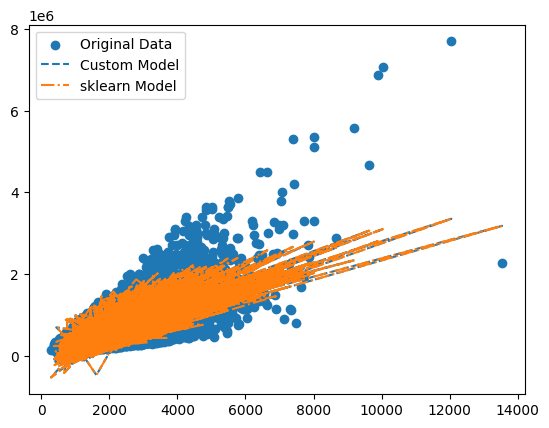

In [174]:
y_pred_custom = model.predict(X)
y_pred_sklearn = sk_model.predict(X)
plt.scatter(X[:,2], Y, label='Original Data')
plt.plot(X[:,2], y_pred_custom, label='Custom Model', linestyle='--')
plt.plot(X[:,2], y_pred_sklearn, label='sklearn Model', linestyle='-.')
plt.legend()



# Outcomes
The model perfectly coincides with the sklearn model, implying good implementation.

The data cannot be fit using a single variable, we need to extend to multi-variable linear regression.

We normalised data to ensure `np.sum()` doesnt overflow, this normalisation causes incorrect parameter values, hence normalization should be done internally and before storing the parameters they should be denormalised.

## Multivariate Regression
NEVER use for loops, especially in gradient descent, it's important to be comfortable with numpy and pandas to avoid for loops.

Need to update normalization and denormalization from forloops to single statements using numpy for division by an array.

Rather skip the denormalization part and save the mean and variance, and while predicting use them to predict the normalized output and then denormalize the output using y mean and variance. -> try both